# KERALA

In [321]:
import pandas as pd

# 1. Load the three Kerala datasets
df_ke_enrolment = pd.read_csv('/content/Kerala Enrolment State.csv')
df_ke_demographic = pd.read_csv('/content/Kerala Demographic State.csv')
df_ke_biometric = pd.read_csv('/content/Kerala Biometric State.csv')

# 2. Convert the 'date' column in each of these three DataFrames to datetime objects
df_ke_enrolment['date'] = pd.to_datetime(df_ke_enrolment['date'], format='%d-%m-%Y')
df_ke_demographic['date'] = pd.to_datetime(df_ke_demographic['date'], format='%d-%m-%Y')
df_ke_biometric['date'] = pd.to_datetime(df_ke_biometric['date'], format='%d-%m-%Y')

# 3. Perform an outer merge of df_ke_enrolment and df_ke_demographic
merged_ke_df_temp = pd.merge(df_ke_enrolment, df_ke_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')

# 4. Merge merged_ke_df_temp with df_ke_biometric to create the final merged DataFrame
df_ke_merged = pd.merge(merged_ke_df_temp, df_ke_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

In [322]:
# 5. Identify all numerical columns in df_ke_merged.
numeric_cols = df_ke_merged.select_dtypes(include=['number']).columns

# 6. Fill any NaN values in these identified numerical columns of df_ke_merged with 0.
df_ke_merged[numeric_cols] = df_ke_merged[numeric_cols].fillna(0)

# 7. Print the first 5 rows of df_ke_merged.
print("Merged Kerala DataFrame (df_ke_merged) head:")
print(df_ke_merged.head())

# 8. Print the information (info) of df_ke_merged.
print("\nMerged Kerala DataFrame (df_ke_merged) info:")
print(df_ke_merged.info())

# 9. Print the descriptive statistics (describe) of df_ke_merged.
print("\nMerged Kerala DataFrame (df_ke_merged) describe:")
print(df_ke_merged.describe())

Merged Kerala DataFrame (df_ke_merged) head:
        date   state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Kerala  Alappuzha   686102      0.0       0.0             0.0   
1 2025-03-01  Kerala  Alappuzha   688001      0.0       0.0             0.0   
2 2025-03-01  Kerala  Alappuzha   688002      0.0       0.0             0.0   
3 2025-03-01  Kerala  Alappuzha   688003      0.0       0.0             0.0   
4 2025-03-01  Kerala  Alappuzha   688004      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0            0.0           0.0          14.0         11.0  
1            0.0           0.0          39.0         96.0  
2            0.0           0.0          42.0         79.0  
3            0.0           0.0          35.0         82.0  
4           20.0         148.0           0.0          0.0  

Merged Kerala DataFrame (df_ke_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352742 entries, 0 to 352

In [323]:
import numpy as np

df_ke = df_ke_merged[df_ke_merged['state'] == 'Kerala'].copy()
df_ke['year'] = df_ke['date'].dt.year
df_ke['month'] = df_ke['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_ke_agg = df_ke.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_ke_agg['totalenrolments'] = df_ke_agg['age_0_5'] + df_ke_agg['age_5_17'] + df_ke_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_ke_agg['childenrolments'] = df_ke_agg['age_0_5'] + df_ke_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_ke_agg['totaldemoupdates'] = df_ke_agg['demo_age_5_17'] + df_ke_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_ke_agg['totalbioupdates'] = df_ke_agg['bio_age_5_17'] + df_ke_agg['bio_age_17_']

In [324]:
# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_ke_agg['CES'] = np.where(
    df_ke_agg['totalenrolments'] == 0,
    0,
    df_ke_agg['childenrolments'] / df_ke_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_ke_agg['DUR'] = np.where(
    df_ke_agg['totalenrolments'] == 0,
    0,
    df_ke_agg['totaldemoupdates'] / df_ke_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_ke_agg['BUR'] = np.where(
    df_ke_agg['totalenrolments'] == 0,
    0,
    df_ke_agg['totalbioupdates'] / df_ke_agg['totalenrolments']
)

print("Shape of df_ke:", df_ke.shape)
print("\nFirst 5 rows of df_ke with new 'year' and 'month' columns:")
print(df_ke.head())
print("\nAggregated DataFrame (df_ke_agg) head:")
print(df_ke_agg.head())
print("\nAggregated DataFrame (df_ke_agg) info:")
print(df_ke_agg.info())
print("\nAggregated DataFrame (df_ke_agg) describe:")
print(df_ke_agg.describe())

Shape of df_ke: (352742, 13)

First 5 rows of df_ke with new 'year' and 'month' columns:
        date   state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Kerala  Alappuzha   686102      0.0       0.0             0.0   
1 2025-03-01  Kerala  Alappuzha   688001      0.0       0.0             0.0   
2 2025-03-01  Kerala  Alappuzha   688002      0.0       0.0             0.0   
3 2025-03-01  Kerala  Alappuzha   688003      0.0       0.0             0.0   
4 2025-03-01  Kerala  Alappuzha   688004      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0            0.0           0.0          14.0         11.0  2025      3  
1            0.0           0.0          39.0         96.0  2025      3  
2            0.0           0.0          42.0         79.0  2025      3  
3            0.0           0.0          35.0         82.0  2025      3  
4           20.0         148.0           0.0          0.0  2025      3 

In [325]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_ke_agg['Enorm'] = df_ke_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_ke_agg['Dnorm'] = df_ke_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_ke_agg['Bnorm'] = df_ke_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_ke_agg['stdnorm'] = (df_ke_agg['Enorm'] + df_ke_agg['Dnorm'] + df_ke_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_ke_agg['ALBI'] = 1 - df_ke_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_ke_agg['ALBI'] = df_ke_agg['ALBI'].clip(lower=0, upper=1)

In [326]:
# --- Risk score calculation ---
df_ke_agg['Enormrisk'] = 1 - df_ke_agg['Enorm']
df_ke_agg['CESrisknorm'] = 1 - df_ke_agg['CES']
df_ke_agg['DURrisknorm'] = 1 - df_ke_agg['DUR']
df_ke_agg['BURrisknorm'] = 1 - df_ke_agg['BUR']
df_ke_agg['ALBIrisknorm'] = 1 - df_ke_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_ke_agg['riskscore'] = (
    df_ke_agg['Enormrisk'] +
    df_ke_agg['CESrisknorm'] +
    df_ke_agg['DURrisknorm'] +
    df_ke_agg['BURrisknorm'] +
    df_ke_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_ke_agg) with normalized metrics, ALBI and riskscore head:")
print(df_ke_agg.head())

Aggregated DataFrame (df_ke_agg) with normalized metrics, ALBI and riskscore head:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Kerala  Alappuzha      0.0       0.0             0.0   
1  2025      3  Kerala  Ernakulam      0.0       0.0             0.0   
2  2025      3  Kerala     Idukki      0.0       0.0             0.0   
3  2025      3  Kerala     Kannur      0.0       0.0             0.0   
4  2025      3  Kerala  Kasaragod      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          196.0        2340.0        2857.0  ...  0.042711  0.170926   
1          915.0        9549.0        5262.0  ...  0.176233  0.326411   
2          105.0         989.0        1688.0  ...  0.018425  0.096796   
3          771.0        7042.0        3868.0  ...  0.131585  0.216506   
4          548.0        4356.0        4084.0  ...  0.082592  0.173073   

    stdnorm      ALBI  Enormrisk  CESrisknorm

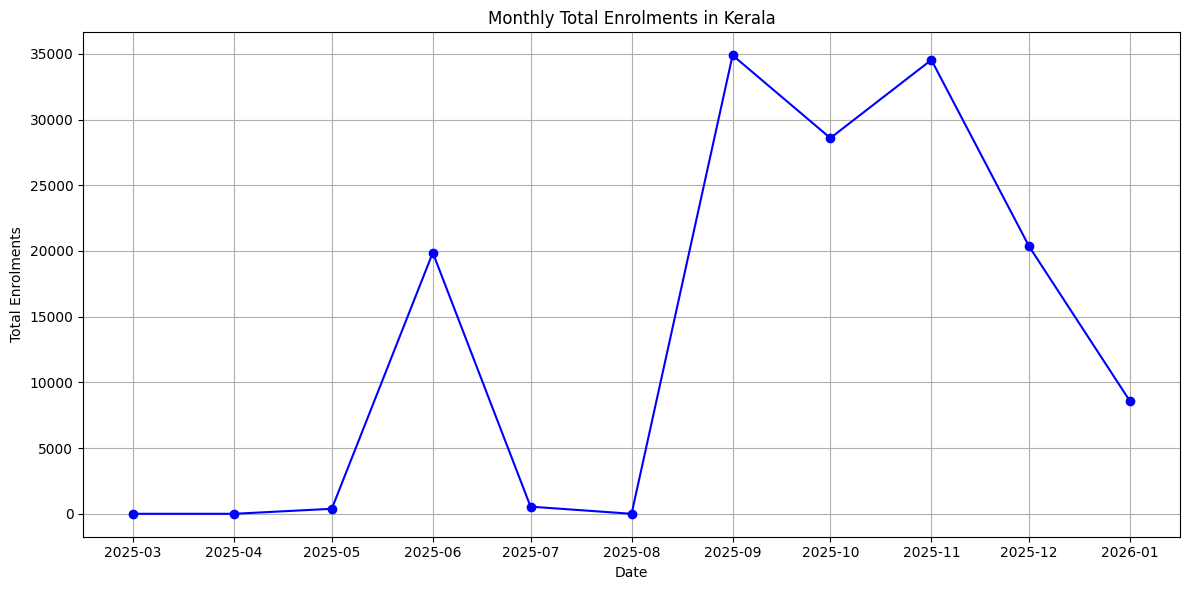

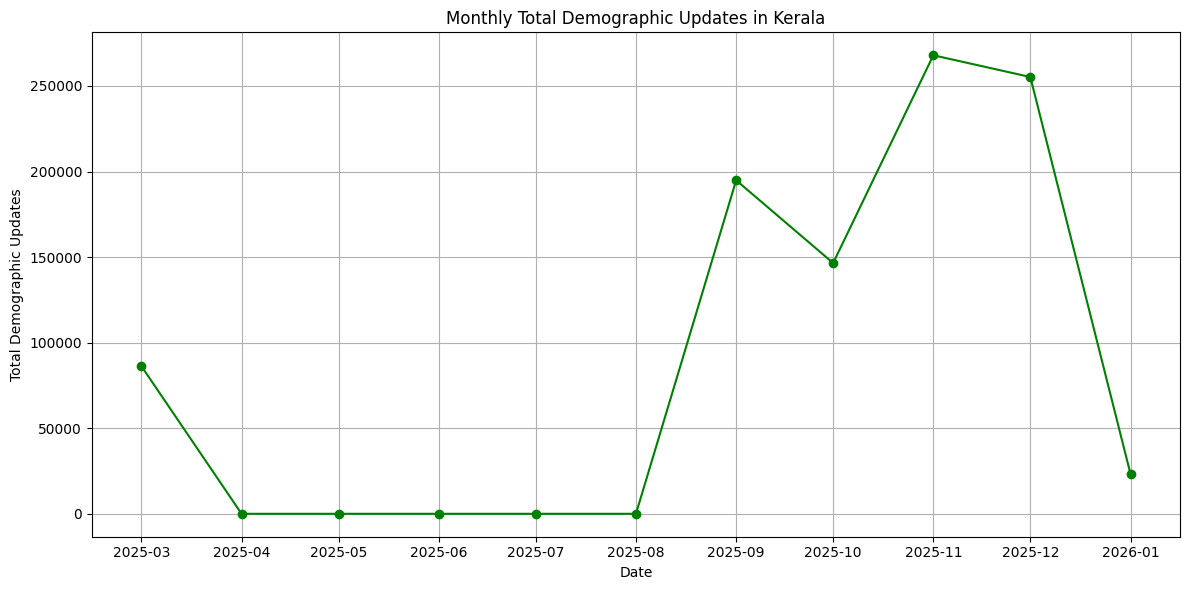

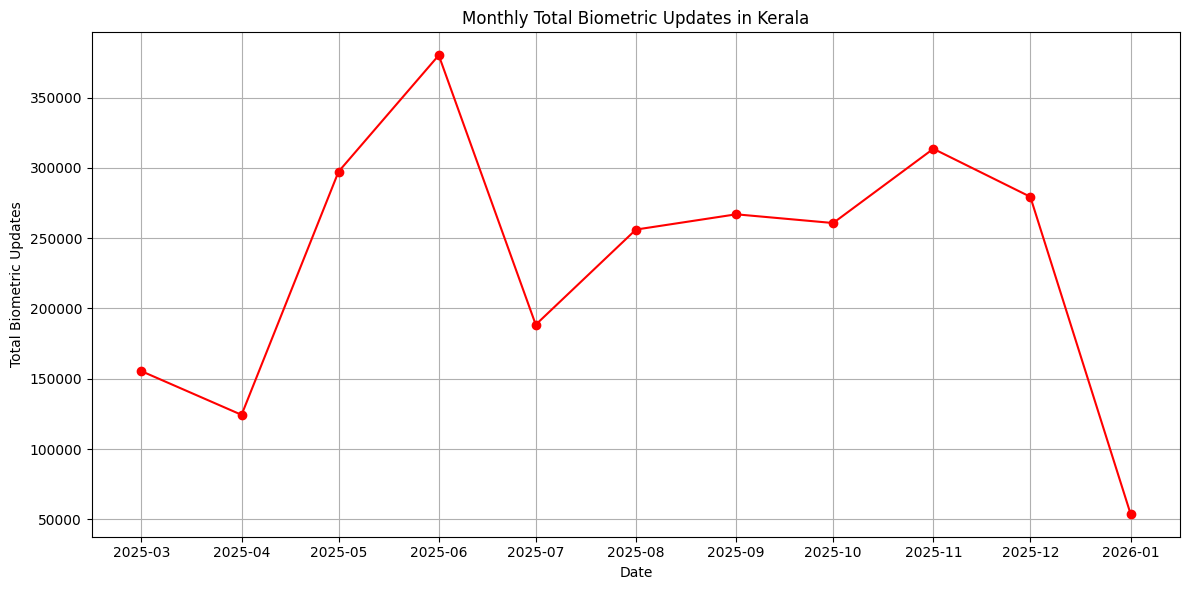

Monthly trend plots generated successfully.


In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

df_ke_monthly_trends = df_ke_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_ke_monthly_trends['date'] = pd.to_datetime(df_ke_monthly_trends['year'].astype(str) + '-' + df_ke_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_ke_monthly_trends = df_ke_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ke_monthly_trends['date'], df_ke_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Kerala')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ke_monthly_trends['date'], df_ke_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Kerala')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_ke_monthly_trends['date'], df_ke_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Kerala')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

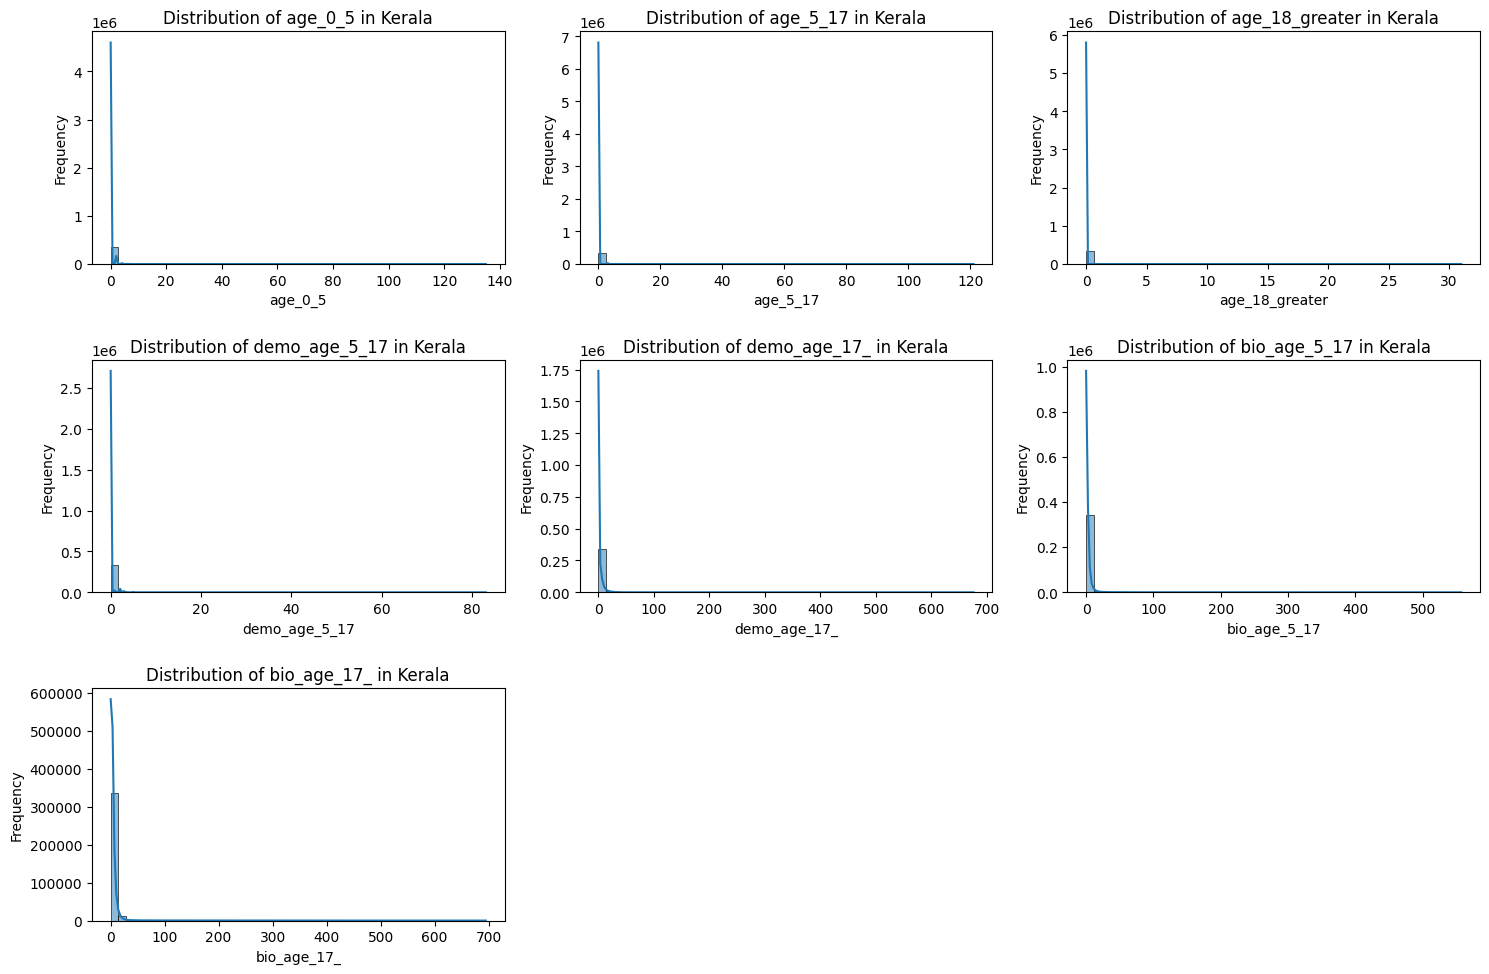

In [328]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_ke_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Kerala')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

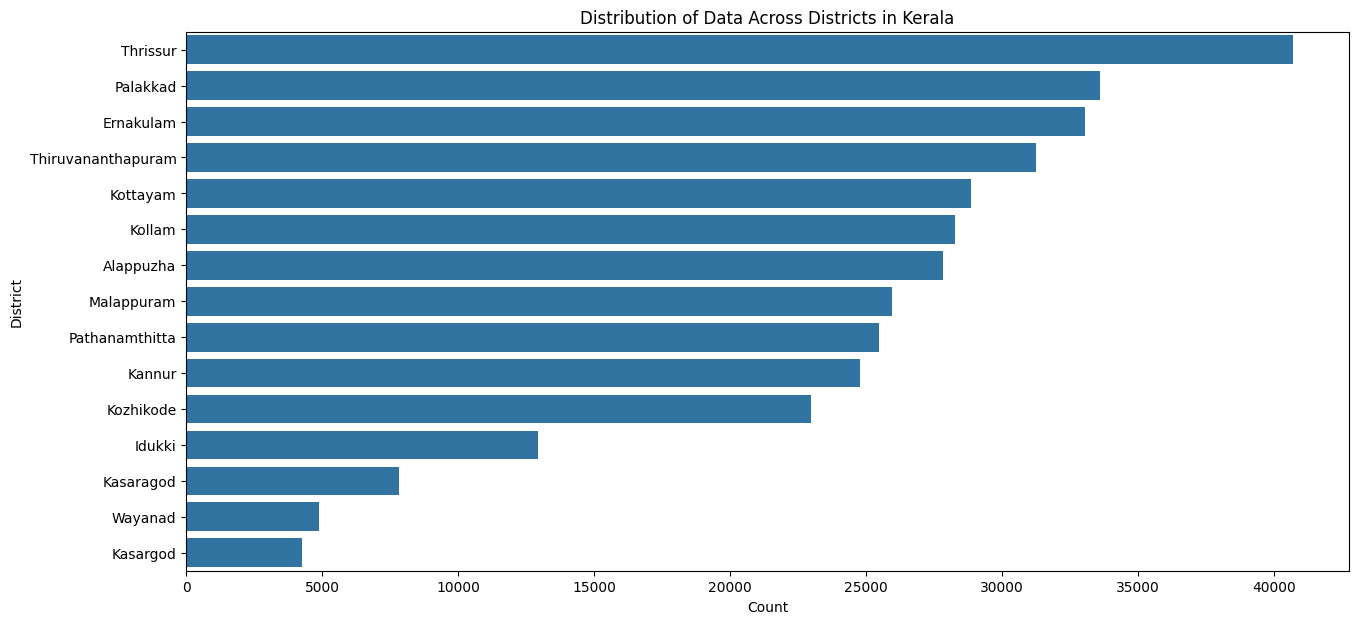

Histograms for numerical age-related columns and count plot for 'district' displayed for Kerala.


In [329]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df_ke_merged, y='district', order=df_ke_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Kerala')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Kerala.")

**Bivariate and Trivariate Analysis**

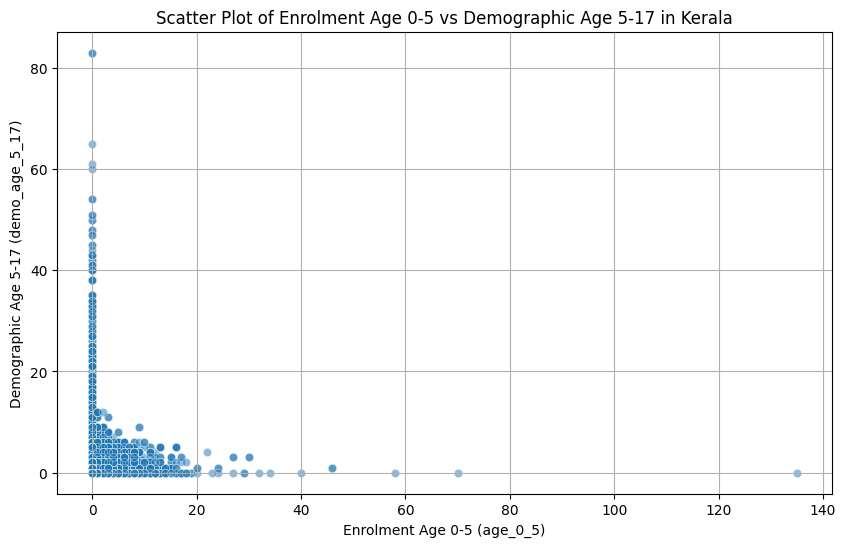

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Kerala.


In [330]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ke_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Kerala')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Kerala.")

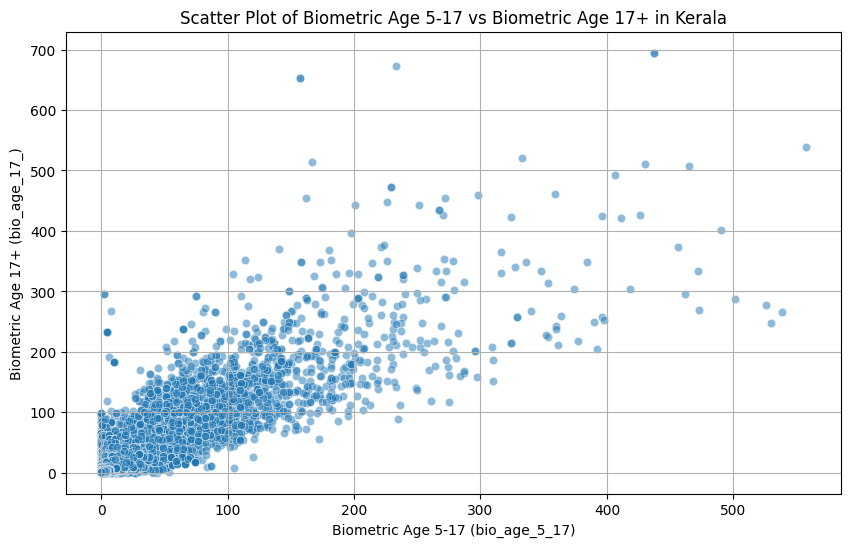

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Kerala.


In [331]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ke_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Kerala')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Kerala.")

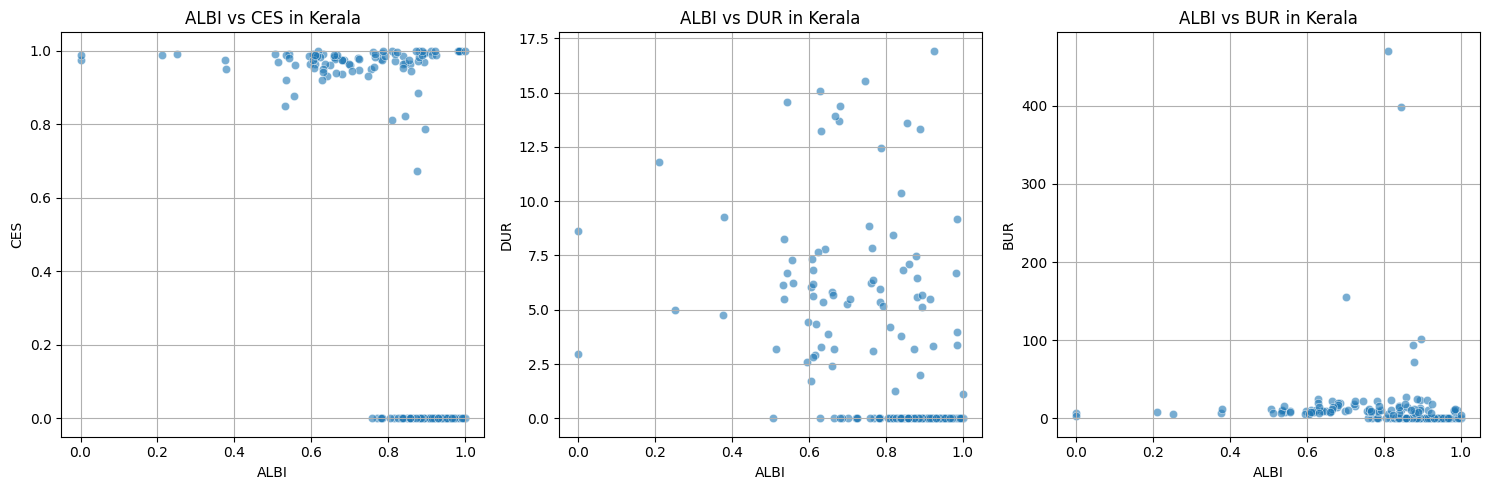

In [332]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_ke_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Kerala')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

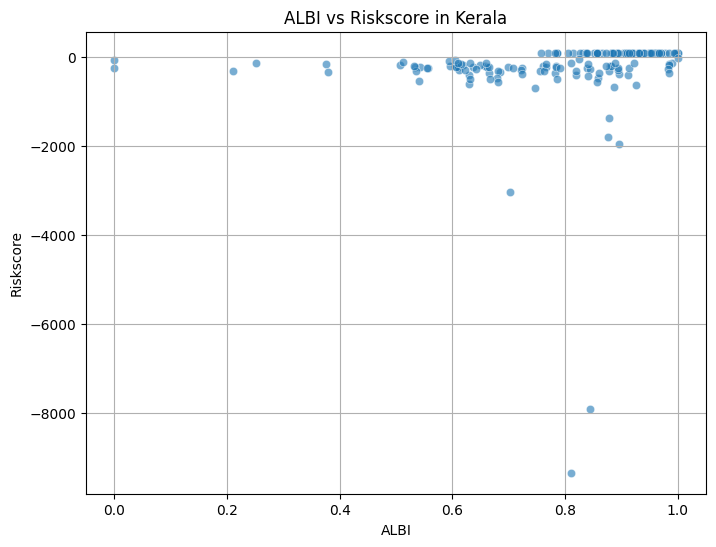

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Kerala.


In [333]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_ke_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Kerala')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Kerala.")

In [334]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_ke = df_ke_merged[numerical_age_cols].corr()

print("Correlation Matrix for Kerala:")
print(correlation_matrix_ke)

Correlation Matrix for Kerala:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.418900        0.145581       0.102100   
age_5_17        0.418900  1.000000        0.188221       0.052890   
age_18_greater  0.145581  0.188221        1.000000       0.008251   
demo_age_5_17   0.102100  0.052890        0.008251       1.000000   
demo_age_17_    0.161290  0.079348        0.024387       0.785382   
bio_age_5_17    0.027672  0.026463       -0.000491       0.147225   
bio_age_17_     0.033443  0.023417        0.002583       0.160823   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.161290      0.027672     0.033443  
age_5_17            0.079348      0.026463     0.023417  
age_18_greater      0.024387     -0.000491     0.002583  
demo_age_5_17       0.785382      0.147225     0.160823  
demo_age_17_        1.000000      0.156781     0.189443  
bio_age_5_17        0.156781      1.000000     0.852112  
bio_age_17

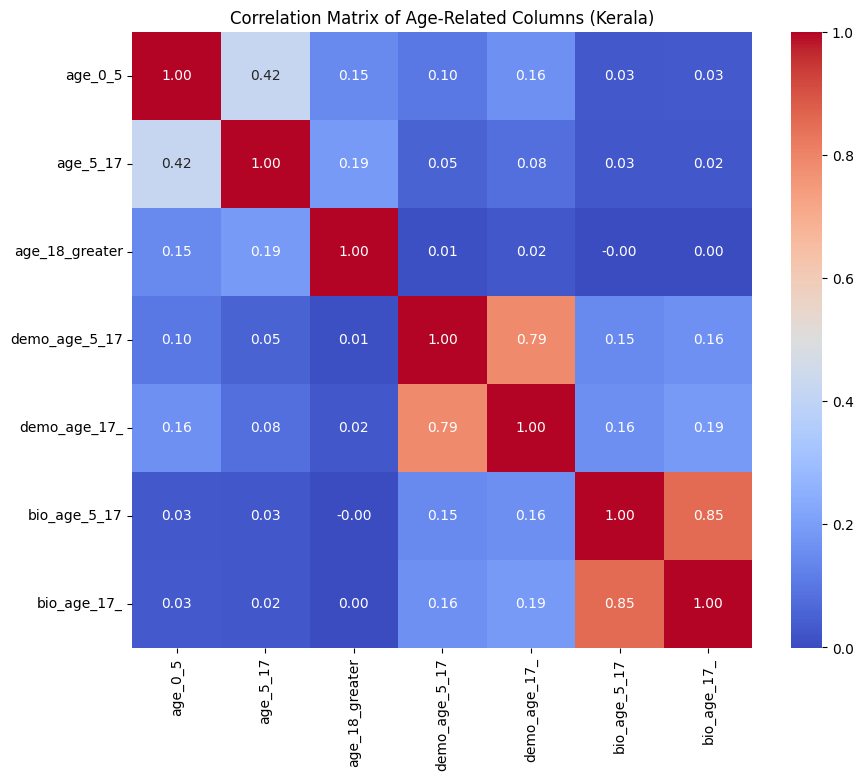

Correlation matrix heatmap for age-related columns displayed for Kerala.


In [335]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_ke, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Kerala)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Kerala.")

In [336]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_ke_district_mean = df_ke_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Kerala:")
print(df_ke_district_mean.head())
print(df_ke_district_mean.info())

df_ke_district_mean['total_avg_age'] = df_ke_district_mean[age_cols_to_group].sum(axis=1)
df_ke_district_mean_top10 = df_ke_district_mean.nlargest(10, 'total_avg_age')

df_ke_district_mean_melted = df_ke_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

District-wise average age-related data for Kerala:
    district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0  Alappuzha  0.168181  0.078362        0.008152       0.119627      1.653977   
1  Ernakulam  0.222216  0.123480        0.015942       0.210479      2.419868   
2     Idukki  0.201220  0.057083        0.003939       0.148154      1.438668   
3     Kannur  0.287495  0.162854        0.017230       0.229956      2.870355   
4  Kasaragod  0.647525  0.258217        0.013045       0.376263      4.382274   

   bio_age_5_17  bio_age_17_  
0      1.904076     3.315712  
1      2.652883     4.295723  
2      2.165920     3.633555  
3      2.860872     4.911351  
4      6.581916     7.603146  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        15 non-null     object 
 1   age_0_5         15 non-null     fl

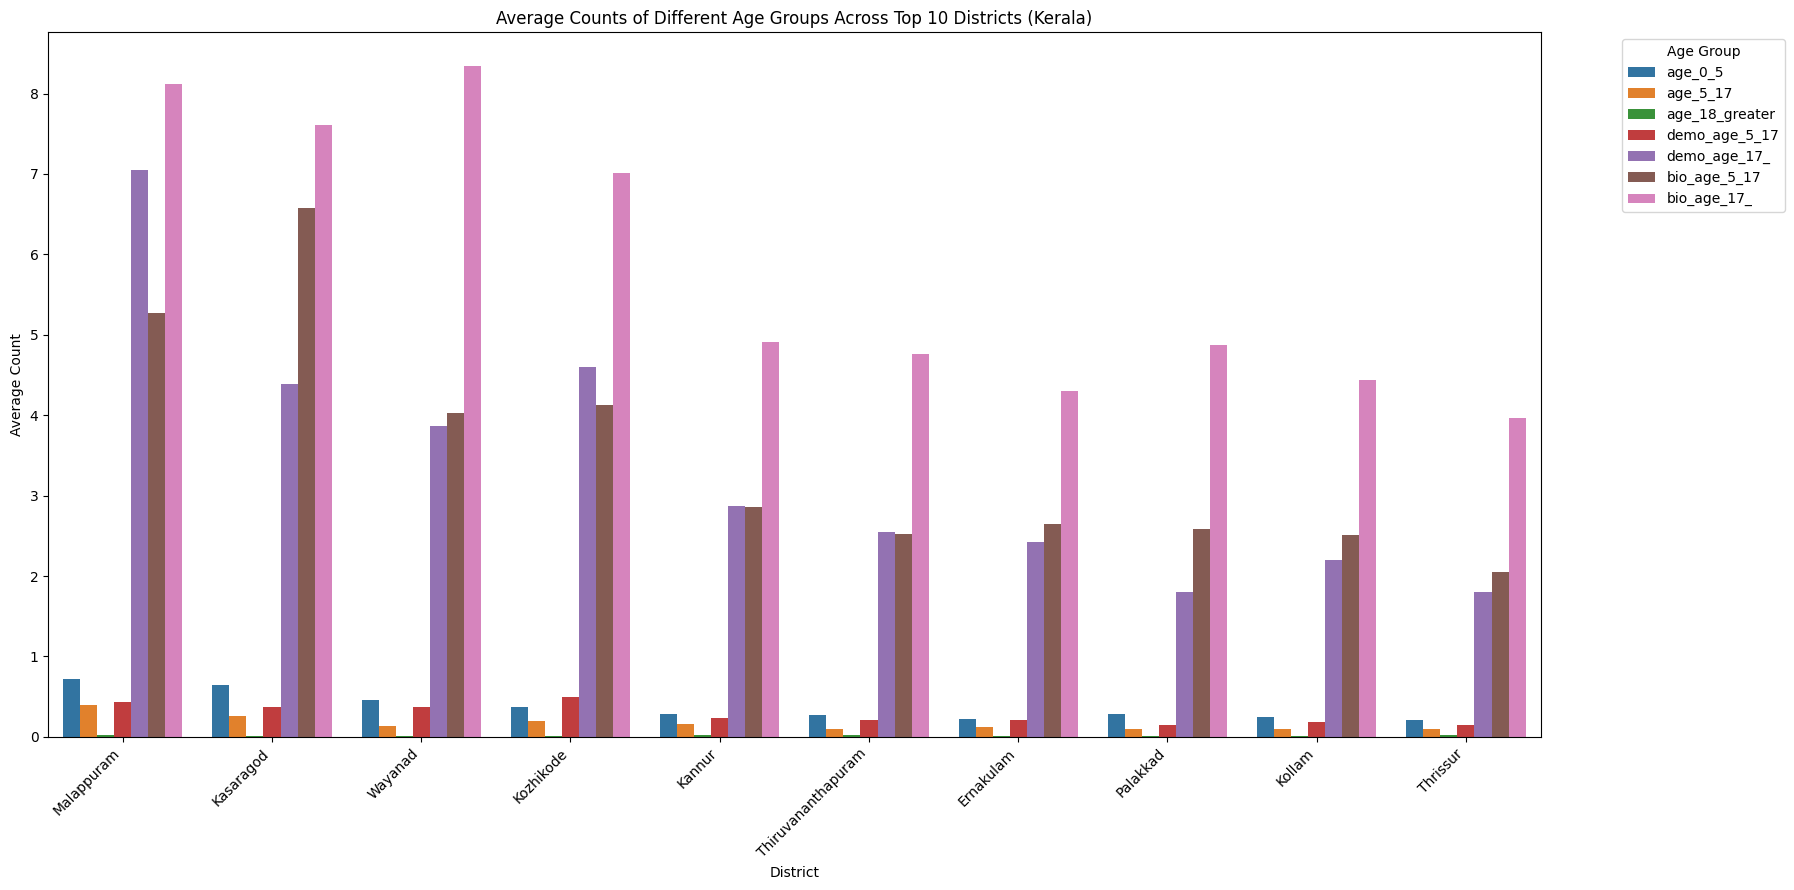

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Kerala, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [337]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_ke_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Kerala)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Kerala, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date):
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0         8203.0       78101.0   
1 2025-04-01      0.0       0.0             0.0            0.0           0.0   
2 2025-05-01    201.0     148.0            31.0            0.0           0.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       60556.0      94871.0  
1       54101.0      70236.0  
2       92832.0      85712.0  
3        5747.0       6973.0  
4        7081.0       8153.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null    datetime64[ns]
 1   a

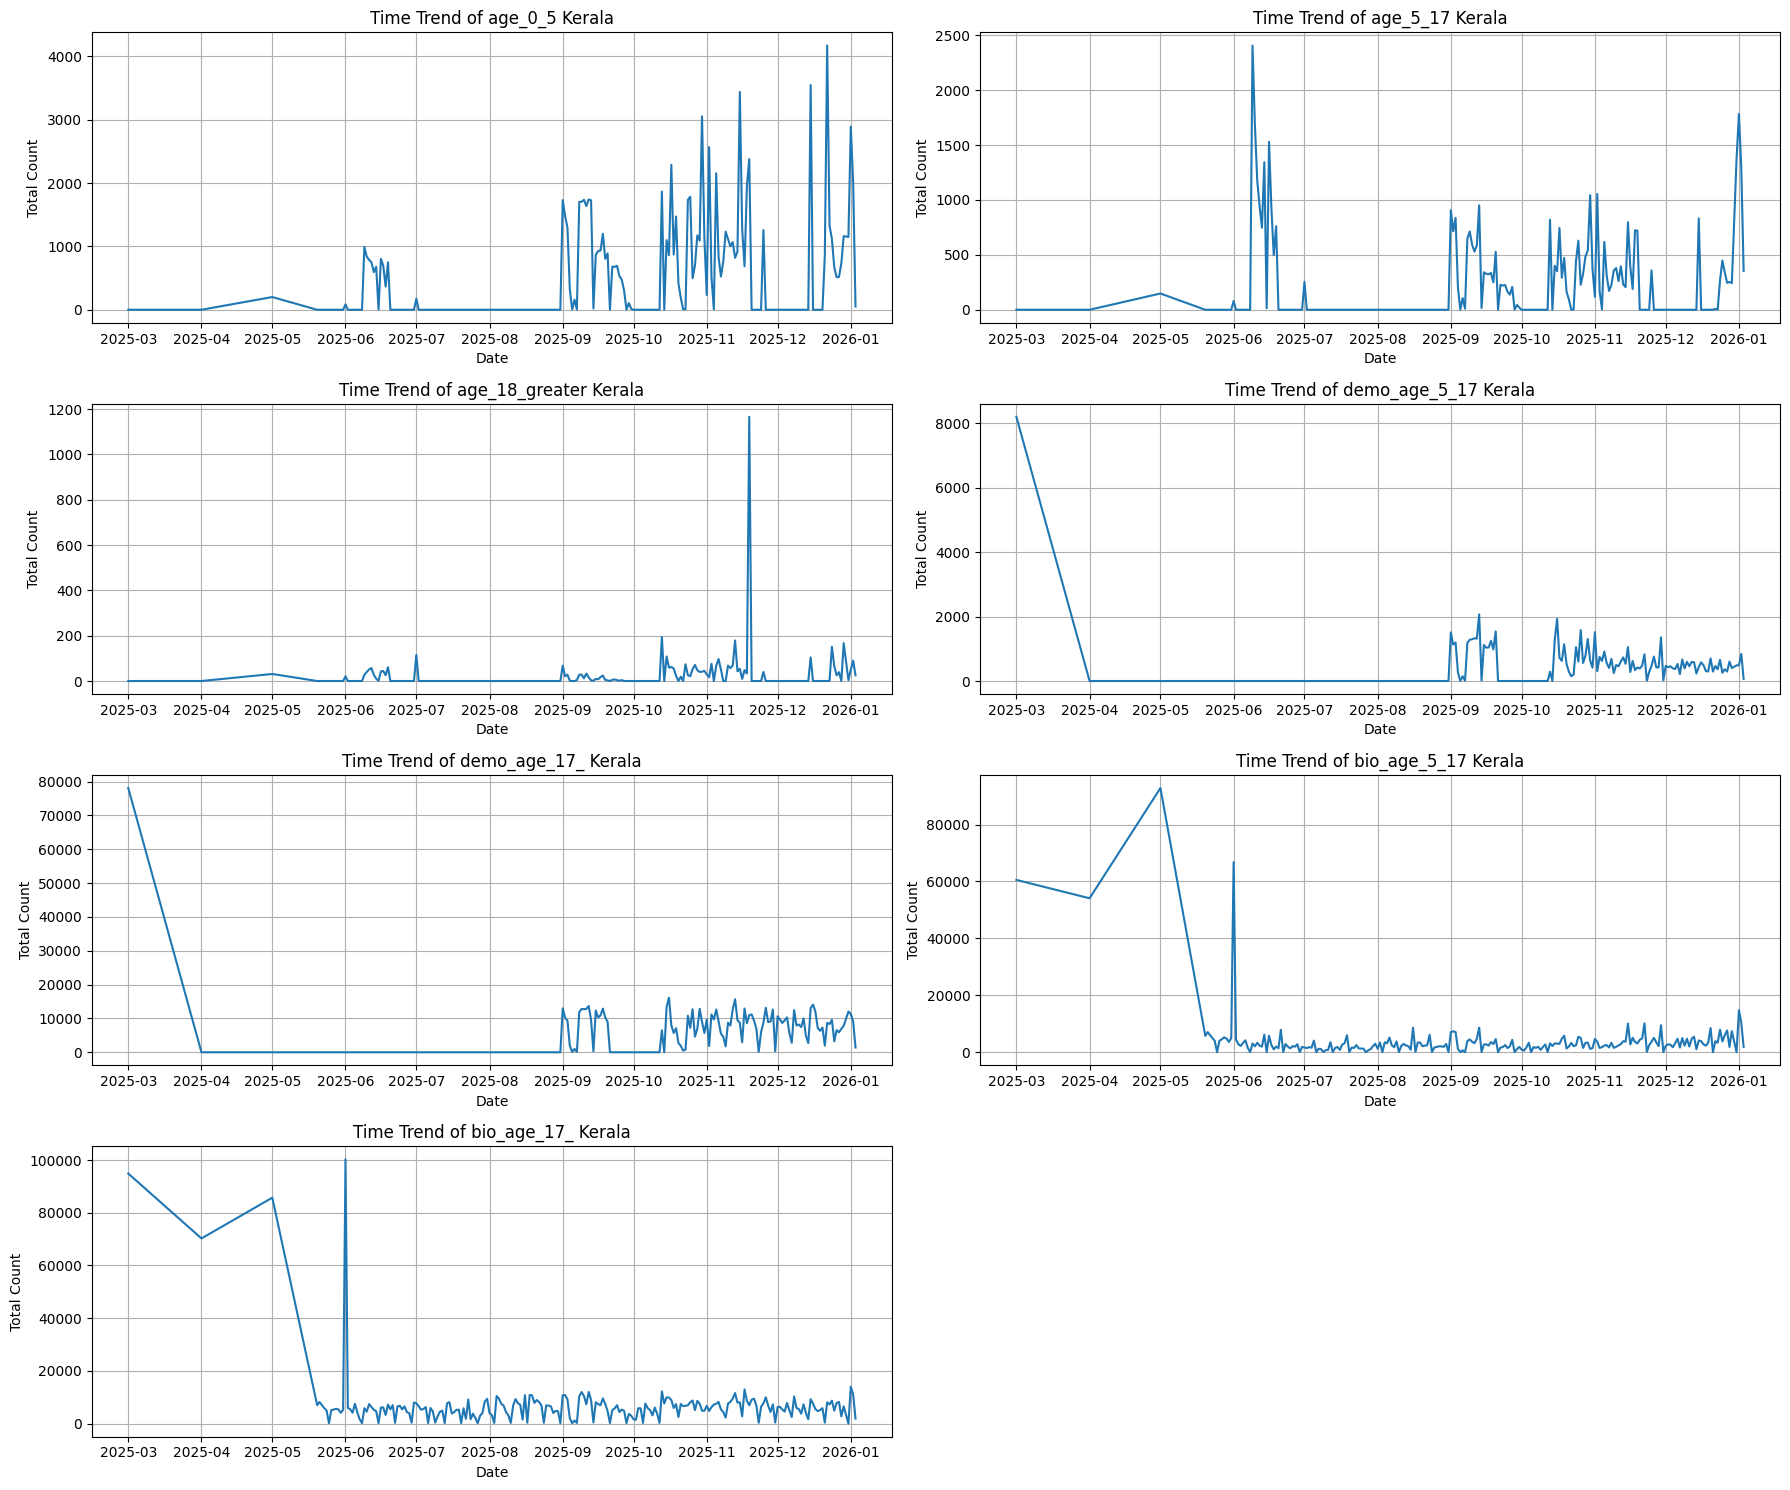

Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [338]:
df_time_trend = df_ke_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date):")
print(df_time_trend.head())
print(df_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} Kerala')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

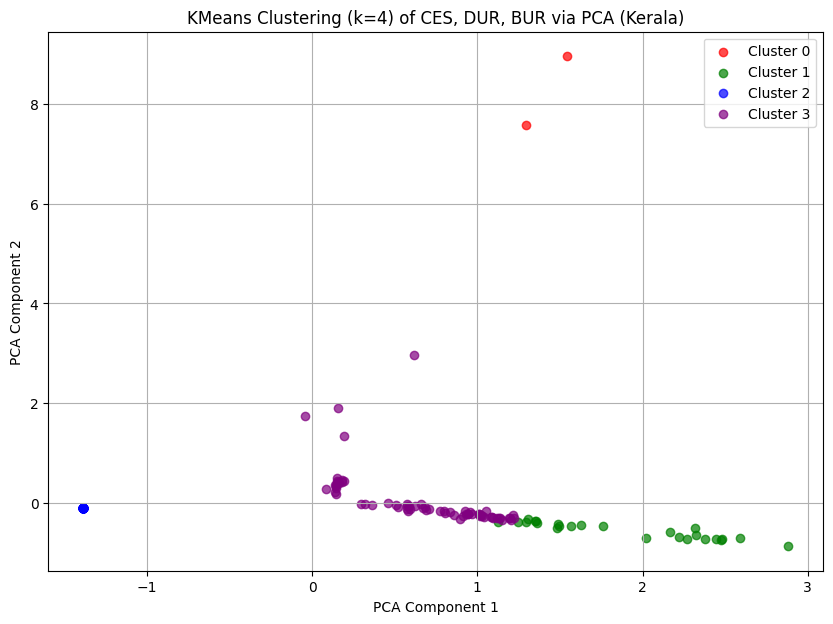

First 5 rows of df_ke_agg with 'clusterlabel' column:
   year  month   state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Kerala  Alappuzha      0.0       0.0             0.0   
1  2025      3  Kerala  Ernakulam      0.0       0.0             0.0   
2  2025      3  Kerala     Idukki      0.0       0.0             0.0   
3  2025      3  Kerala     Kannur      0.0       0.0             0.0   
4  2025      3  Kerala  Kasaragod      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          196.0        2340.0        2857.0  ...  0.170926  0.071212   
1          915.0        9549.0        5262.0  ...  0.326411  0.167548   
2          105.0         989.0        1688.0  ...  0.096796  0.038407   
3          771.0        7042.0        3868.0  ...  0.216506  0.116030   
4          548.0        4356.0        4084.0  ...  0.173073  0.085222   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm  ALBIrisknor

In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_ke_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_ke_agg
df_ke_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_ke_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Kerala)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_ke_agg with 'clusterlabel' column:")
print(df_ke_agg.head())

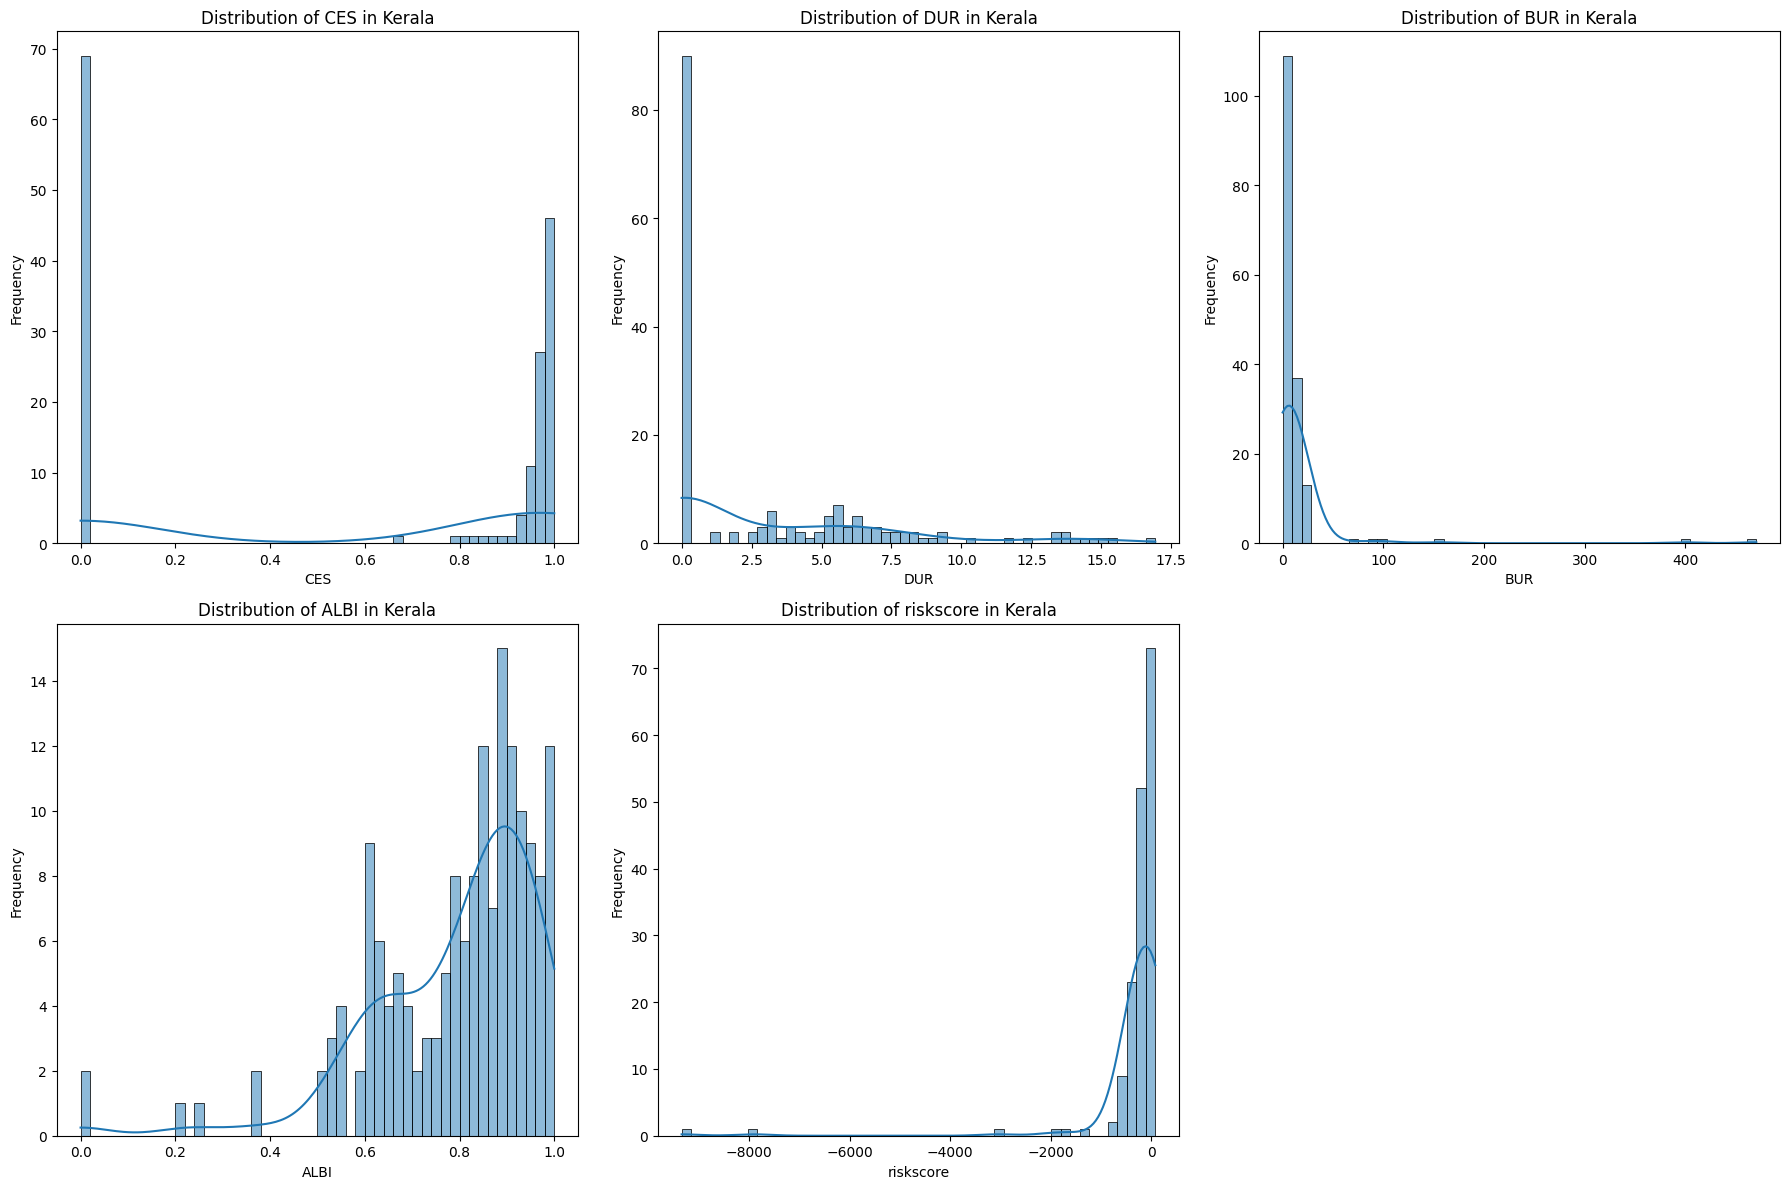

Histograms for CES, DUR, BUR, ALBI, and riskscore in Kerala displayed.


In [340]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_ke_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Kerala')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Kerala displayed.")

In [341]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_ke_agg['year'].max()
latest_month = df_ke_agg[df_ke_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_ke_agg for the latest year and month
df_latest_month = df_ke_agg[(df_ke_agg['year'] == latest_year) & (df_ke_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
          district      CES
            Idukki 1.000000
          Kasargod 1.000000
           Wayanad 1.000000
    Pathanamthitta 1.000000
         Kasaragod 0.995381
          Kottayam 0.991176
        Malappuram 0.989376
            Kollam 0.989170
Thiruvananthapuram 0.988196
         Ernakulam 0.985714

Bottom 10 Districts by CES (Year 2026, Month 1):
          district      CES
         Alappuzha 0.940447
          Thrissur 0.941880
         Kozhikode 0.969174
          Palakkad 0.973589
            Kannur 0.985255
         Ernakulam 0.985714
Thiruvananthapuram 0.988196
            Kollam 0.989170
        Malappuram 0.989376
          Kottayam 0.991176

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
          district      DUR
           Wayanad 3.333333
          Thrissur 3.285470
         Alappuzha 3.210918
    Pathanamthitta 3.183432
         Kozhi

## Summary (Kerala):

The Aadhaar lifecycle analysis for Kerala reveals significant variations in enrolment and update activities across its districts. The `df_ke_agg` dataset, which aggregates data by month and district, serves as the foundation for calculating key performance indicators.

### Key Observations:

1.  **Data Aggregation and Metrics**: The initial datasets were successfully merged and cleaned, leading to the creation of `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates`. From these, derived metrics such as Child Enrolment Score (CES), Demographic Update Rate (DUR), and Biometric Update Rate (BUR) were calculated, with proper handling for division by zero.

2.  **Normalization and ALBI**: Min-max normalization was applied to key activity metrics (`totalenrolments`, `totaldemoupdates`, `totalbioupdates`) to create `Enorm`, `Dnorm`, and `Bnorm`. These were then combined to calculate `stdnorm` and the Aadhaar Lifecycle Balance Index (ALBI), providing a measure of balance between enrolment and update activities.

3.  **Risk Score**: A `riskscore` was computed by integrating risk-normalized versions of the key metrics. This score aims to identify districts that might face operational challenges due to imbalances or deficiencies in their Aadhaar lifecycle management.

4.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates showed temporal patterns, indicating periods of higher or lower activity. These trends can help in understanding seasonal variations or the impact of specific campaigns.

5.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Several districts (Idukki, Kasargod, Wayanad, Pathanamthitta) showed a perfect score of 1.0, indicating that all enrolments were child enrolments in that period. Alappuzha (0.940) and Thrissur (0.942) had slightly lower but still high scores.
    *   **DUR (Demographic Update Rate)**: Wayanad (3.33) and Thrissur (3.29) led in demographic updates relative to total enrolments. Kasargod (1.10) and Kasaragod (1.27) were among the lowest, suggesting lower update activity relative to enrolments.
    *   **BUR (Biometric Update Rate)**: Alappuzha (11.76) and Pathanamthitta (11.08) had the highest biometric update rates. Malappuram (3.42) and Kasargod (3.97) were at the lower end, indicating areas where biometric updates are less frequent compared to enrolments.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Kasargod (1.0) and Wayanad (0.922) exhibited the best balance, close to 1, while Malappuram (0.0) and Kozhikode (0.513) showed the least balance.
    *   **Risk Score**: Kasargod (-41.33) and Kasaragod (-58.08) had the highest (least negative) risk scores among the top 10. Several districts, including Alappuzha (-235.00) and Pathanamthitta (-223.94), displayed significant negative risk scores. As noted in other state analyses, these negative scores suggest an issue with the interpretation or calculation of the risk score, as a risk score should ideally be bounded between 0 and 100. This anomaly requires further investigation to ensure the metric accurately reflects risk.

6.  **Clustering Analysis**: KMeans clustering successfully grouped districts into four distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Kerala's districts.

### Conclusion:

Kerala exhibits diverse performance across its districts. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The anomalies in the `riskscore` calculation need to be addressed to ensure a meaningful risk assessment. Further investigation into districts with low DUR/BUR and imbalanced ALBI is recommended to identify underlying causes and implement targeted interventions.